In [1]:
import numpy as np
import math, os
import helper_fcns as hf
import descr_fit as dF
import autoreload
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import seaborn as sns
sns.set(style='ticks')
% matplotlib inline

import pdb

# constants - directories
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/sach-data/';
data_name = 'sachData.npy'

In [3]:
sdp = np.load(data_loc + data_name).item()

### Some simple plotting

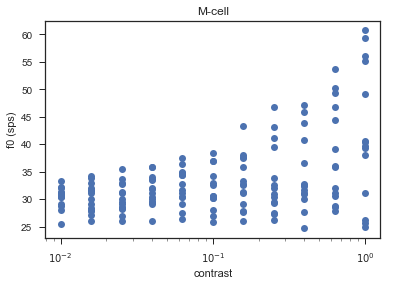

In [6]:
cellNum = 31;
plt.semilogx(sdp[cellNum-1]['data']['cont'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('contrast'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

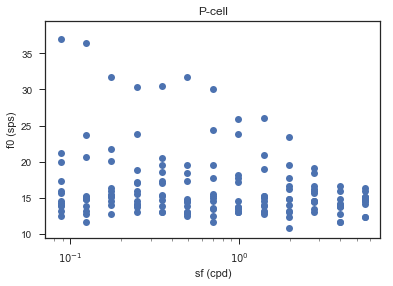

In [32]:
cellNum = 15;
plt.semilogx(sdp[cellNum-1]['data']['sf'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

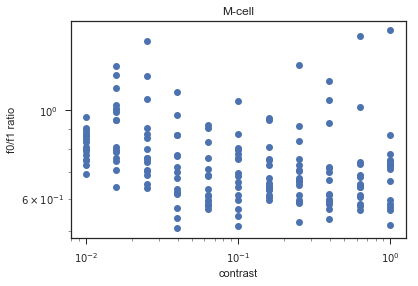

In [33]:
cellNum = 1;
plt.loglog(sdp[cellNum-1]['data']['cont'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('contrast'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

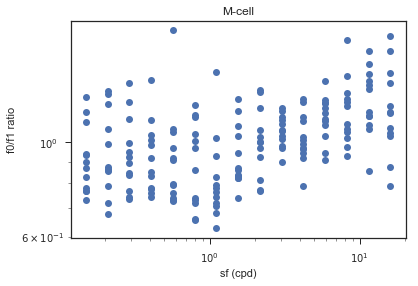

In [34]:
cellNum = 2;
plt.loglog(sdp[cellNum-1]['data']['sf'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

### Now, organized plotting

Spatial frequency tuning

In [88]:
autoreload.reload(hf);

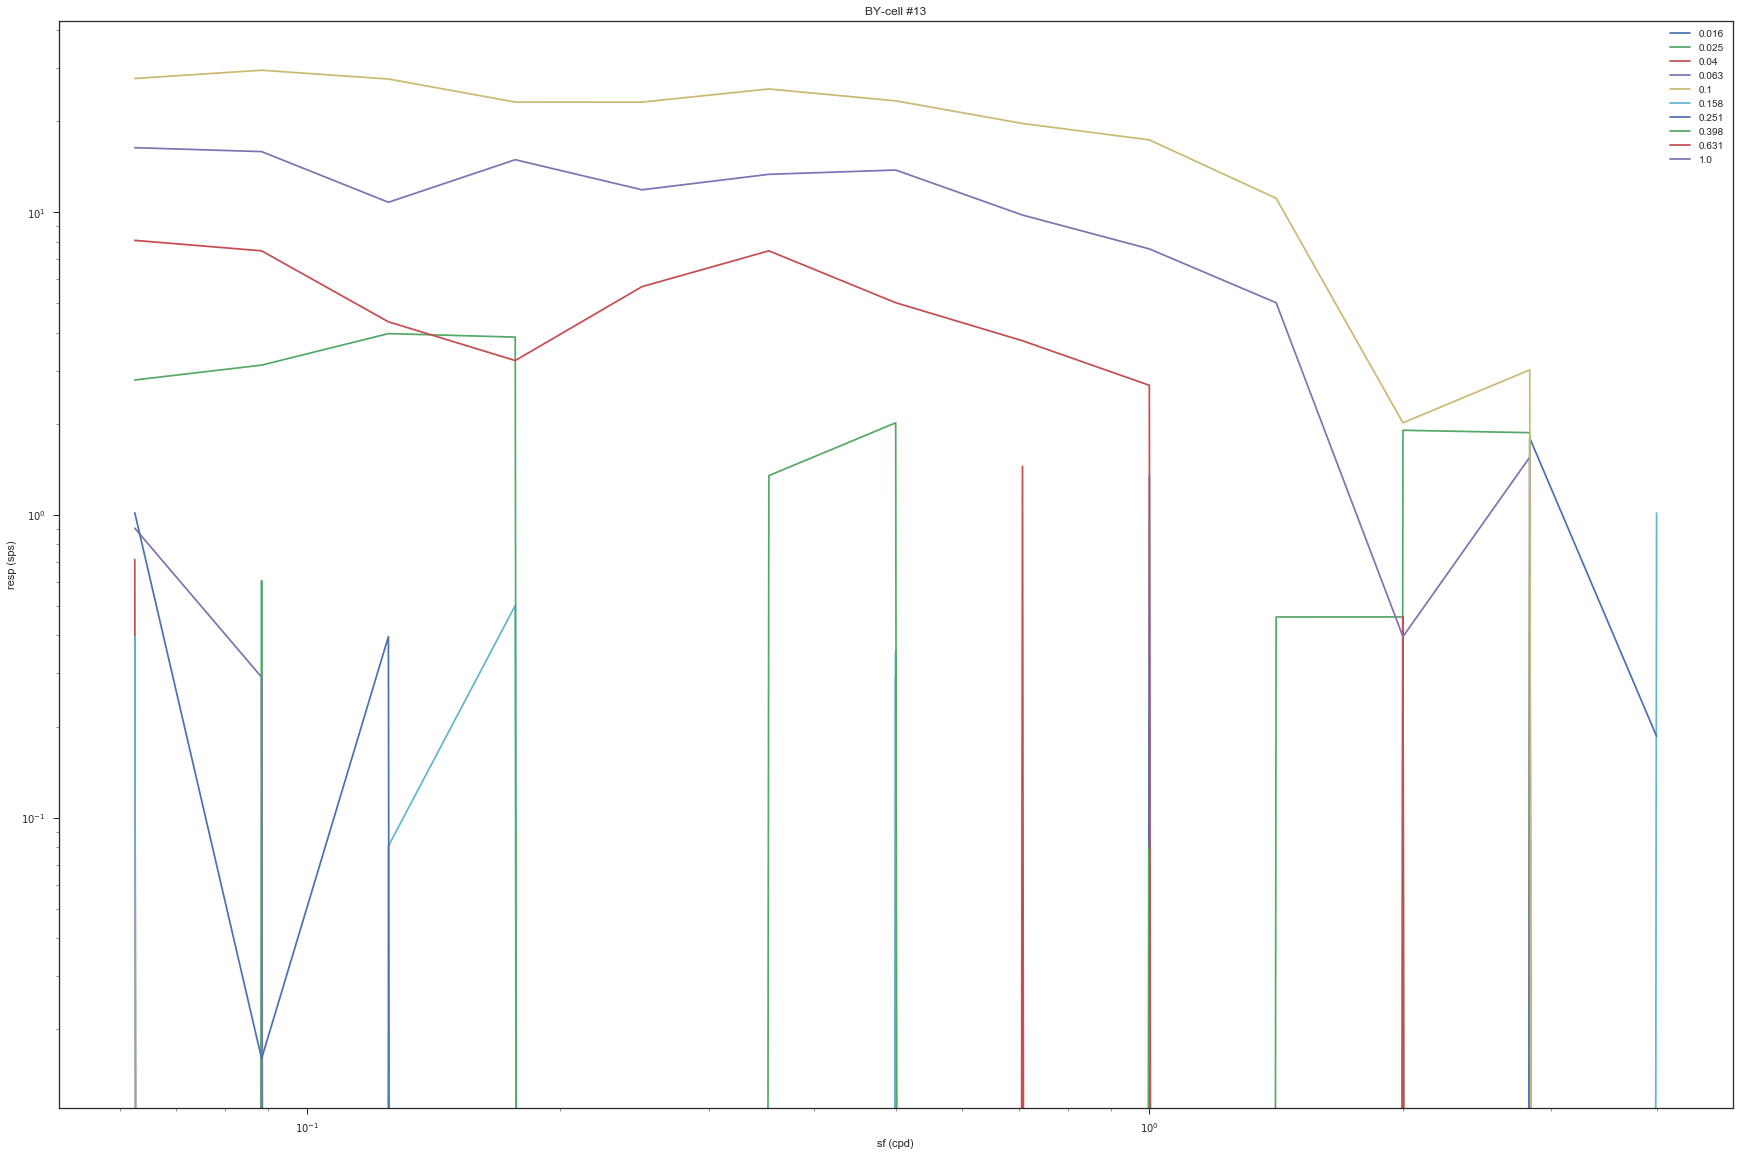

In [73]:
cellNum = 13;
data = sdp[cellNum-1]['data'];
resps, stims, respsArr = hf.tabulateResponses(data);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
for i in range(len(cons)):
#     gtThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[gtThresh], f0['mean'][i, gtThresh]-baseline, '-');
    plt.loglog(sfs[sfs_gt0], f0['mean'][i, sfs_gt0]-baseline, '-');
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [6]:
sdp[0]['cellType']

'M-cell'

Response versus contrast curves

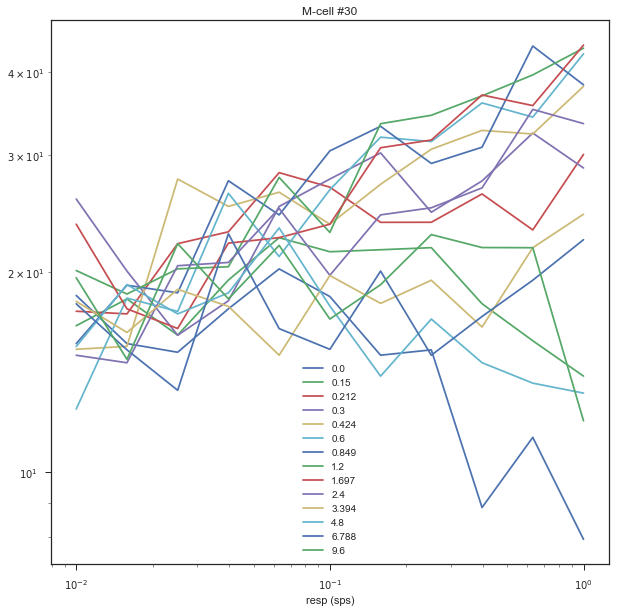

In [107]:
cellNum = 30;
resps, stims = hf.tabulateResponses(sdp[cellNum-1]['data']);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(10, 10))
for i in range(len(sfs)):
    plt.loglog(cons, f0['mean'][:, i]-baseline, '-');
#     plt.errorbar(cons, f0['mean'][:, i], f0['sem'][:, i], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('con (%)');
plt.xlabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in sfs], loc=0);

In [4]:
dogFit = np.load('sach-data/descrFits.npy', encoding='latin1').item()
flexFit = np.load('sach-data/dFitsFlex.npy', encoding='latin1').item()

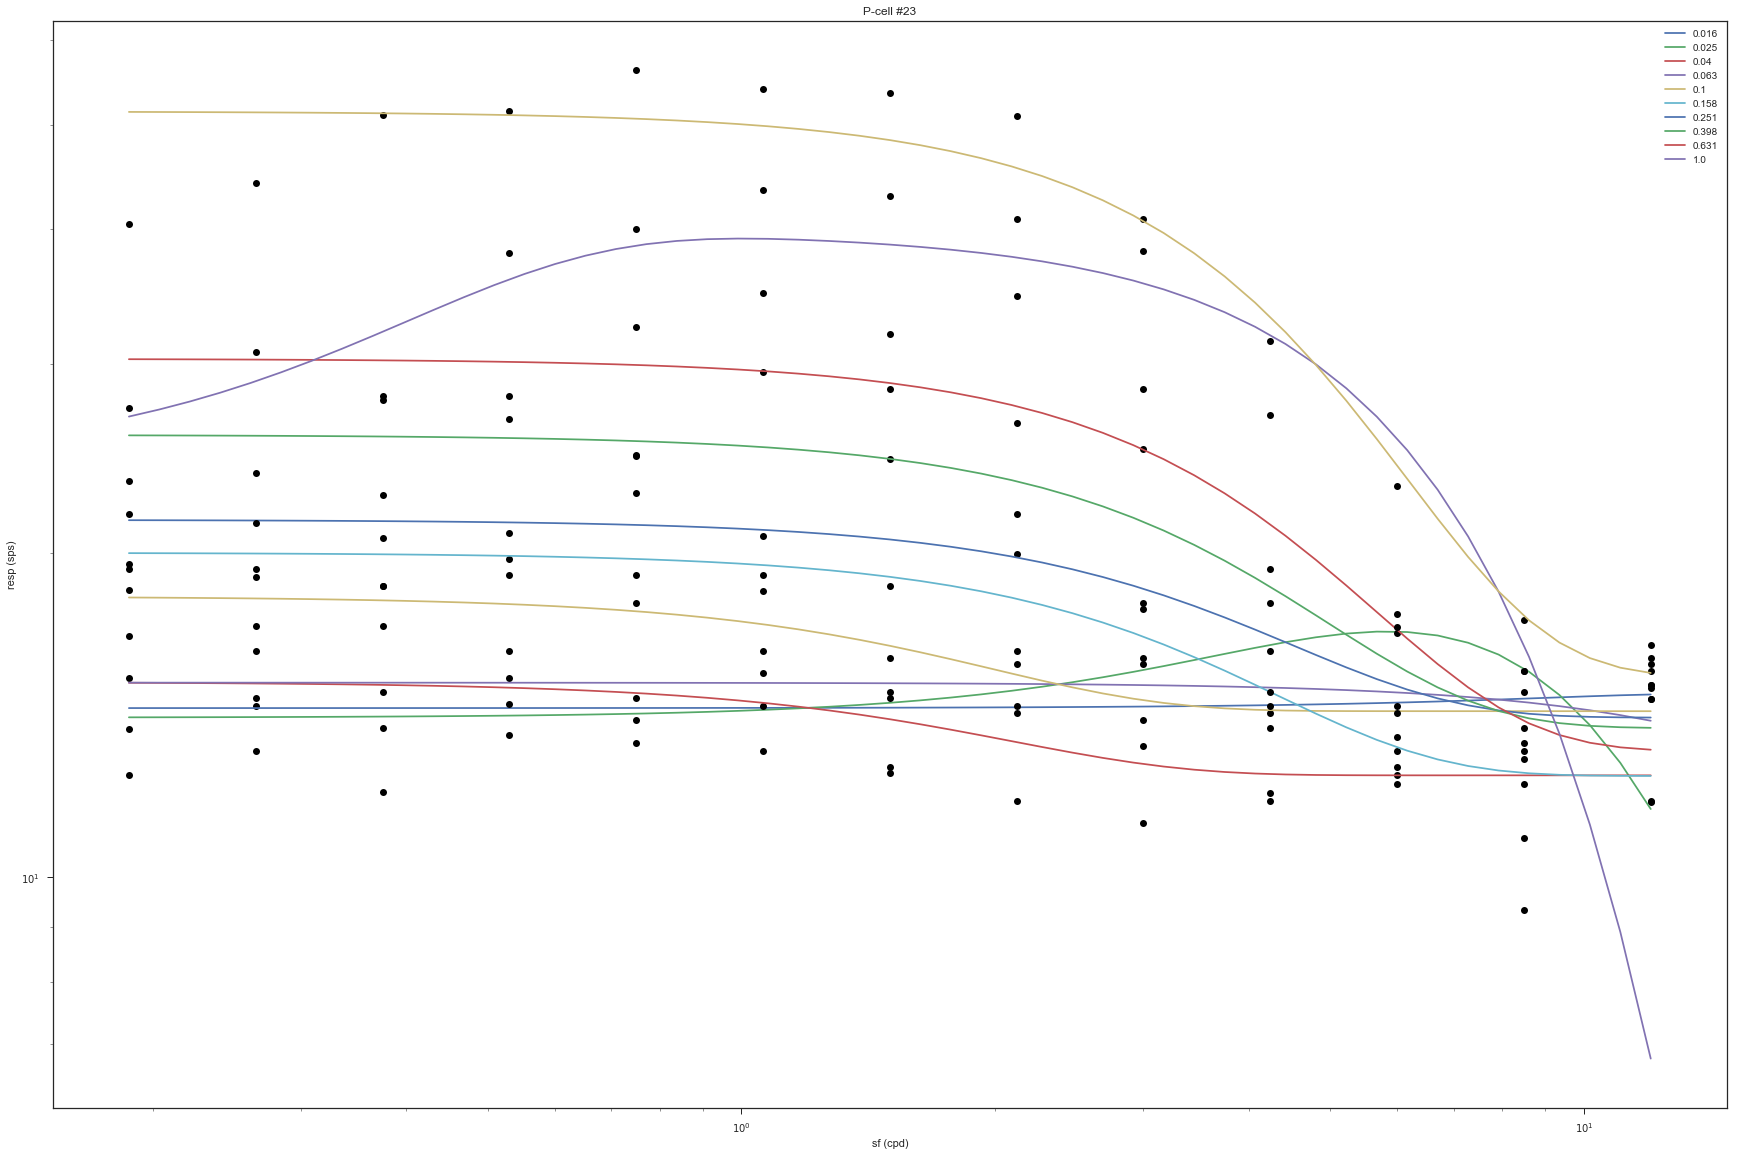

In [5]:
cellNum = 23;
data = sdp[cellNum-1]['data'];
resps, stims, _ = hf.tabulateResponses(data);
currDescr = dogFit[cellNum-1]['params'];

base_sub = 0;

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

plotSfs = np.logspace(np.log10(np.min(sfs[sfs_gt0])), np.log10(np.max(sfs[sfs_gt0])), 51)

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
lines = [];
for i in range(len(cons)):
    dataThresh = np.where((f0['mean'][i, :])>1e0)[0];
    if base_sub:
        plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh] - baseline, 'ko');
    else:
        plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh], 'ko');
    modResp, _ = np.array(hf.DiffOfGauss(*currDescr[i], plotSfs));
    curr_line = plt.loglog(plotSfs[modResp>1], modResp[modResp>1])[0];
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')
    lines.append(curr_line);

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum));
plt.legend(lines, [str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [88]:
cellNum = 12;
data = sdp[cellNum-1]['data'];
resps, stims, respArr = hf.tabulateResponses(data);
base, _ = hf.blankResp(data);
print('baseline rate is %.2f' % base)
print('mean rates with contrast are:')
for con, rate in zip(stims[0], resps[0]['mean']):
    print('con %.2f: max rate %.2f' % (con, np.max(rate)))

baseline rate is 12.89
mean rates with contrast are:
con 0.01: max rate 17.35
con 0.02: max rate 17.90
con 0.03: max rate 17.53
con 0.04: max rate 18.26
con 0.06: max rate 19.35
con 0.10: max rate 22.53
con 0.16: max rate 26.44
con 0.25: max rate 32.36
con 0.40: max rate 35.25
con 0.63: max rate 43.61
con 1.00: max rate 61.23


In [79]:
respArr

[{0: {0: array([[  5.9964,  23.9904,  37.9772,  25.9844,   5.9964,  39.968 ,
            31.9808,  45.9816,  27.9832,   7.9952,  39.976 ,  37.9772,
            17.9892,  41.9748,  17.9892,   9.994 ,  17.9892,  37.9848,
            33.9796,  25.9844,      nan,      nan,      nan,      nan,
                nan]]),
   1: array([[ 31.9361,  27.9385,  25.9844,  37.9242,  35.9784,  33.9796,
            31.9872,  17.9892,  27.9832,  23.9808,  33.9864,  29.982 ,
            33.9864,  33.9796,  17.9892,  23.9856,  18.0144,  37.9848,
            27.9832,  31.9808,      nan,      nan,      nan,      nan,
                nan]]),
   2: array([[  3.9976,  17.9892,  23.9808,  23.9856,  19.984 ,  31.9872,
            41.9748,  15.9904,  29.982 ,  35.9784,  23.9856,  19.984 ,
            41.9748,  23.9856,  35.9856,  15.9904,  19.988 ,  21.9868,
            33.9864,  29.982 ,      nan,      nan,      nan,      nan,
                nan]]),
   3: array([[ 25.9896,  17.9856,  25.9844,  31.9744,  15.9904, 

/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/helper_fcns.py:44: RuntimeWarning: invalid value encountered in true_divide
  dog_norm = lambda f: dog(f) / norm;


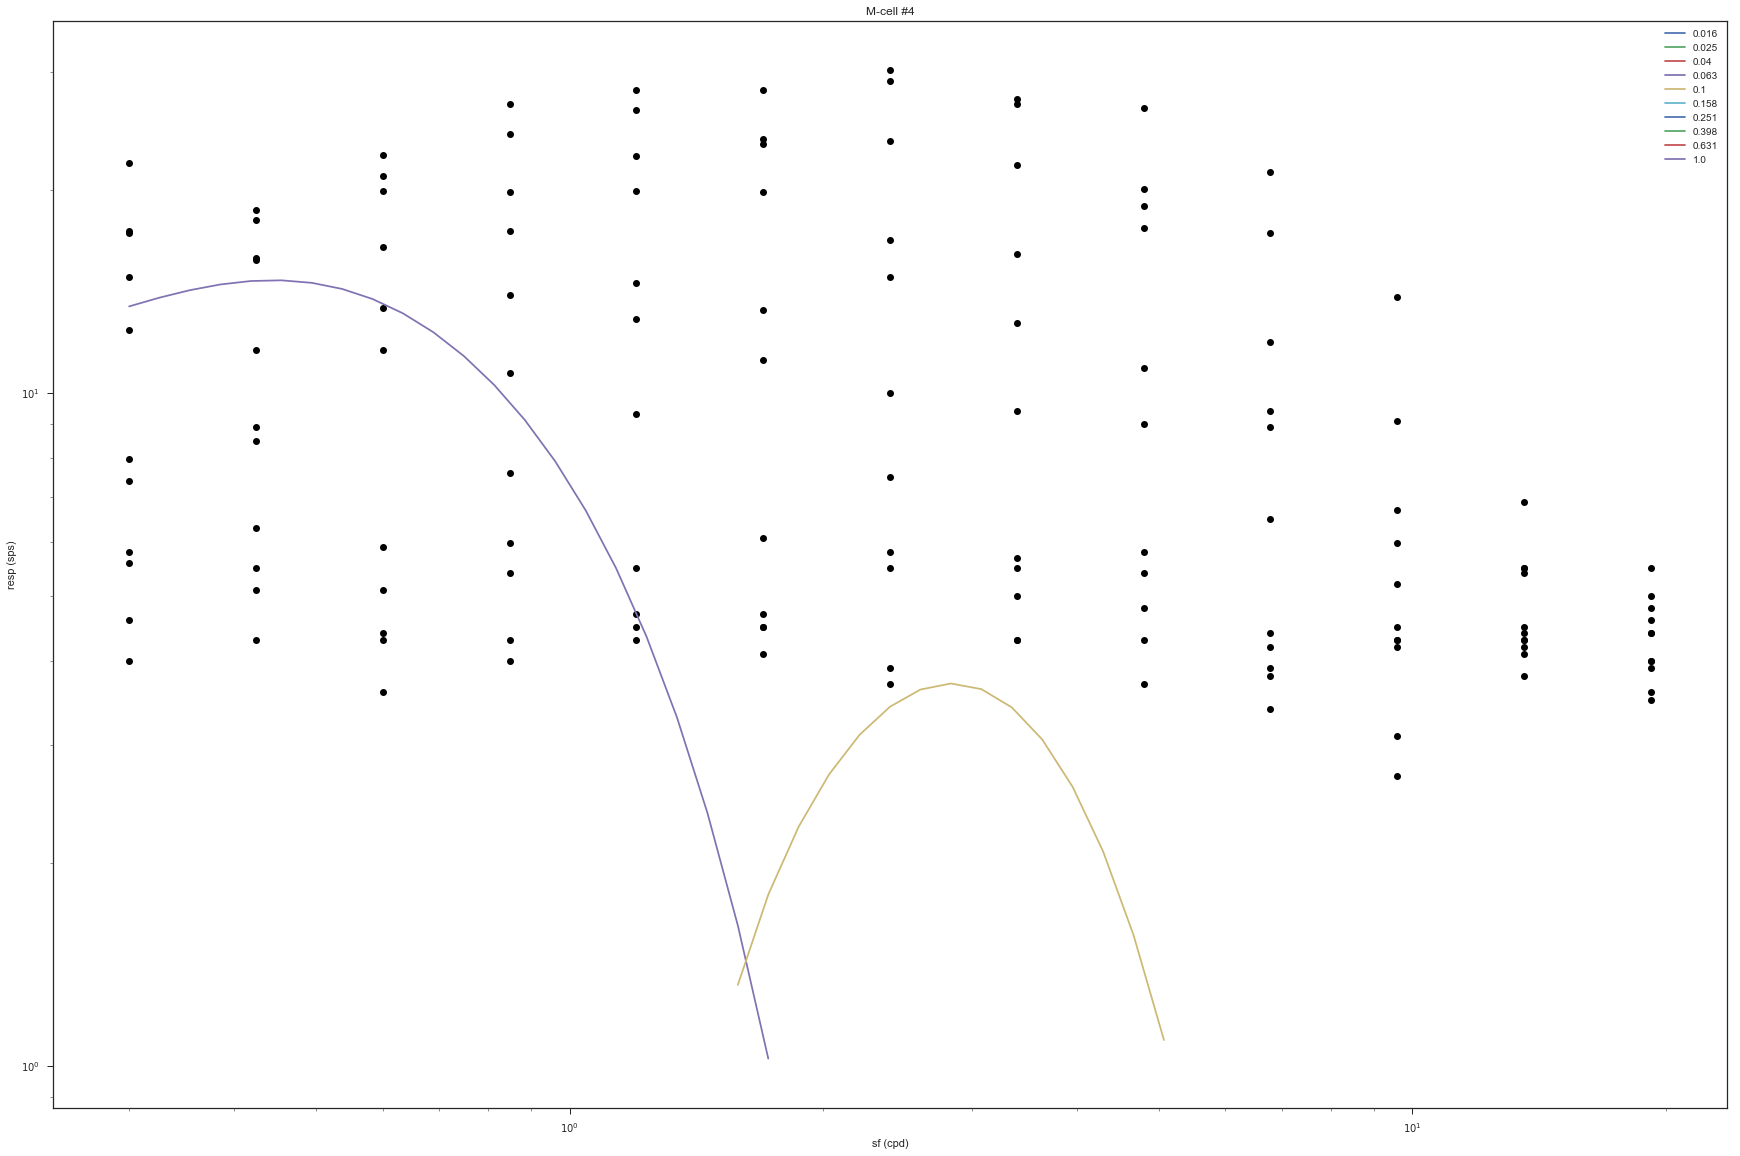

In [146]:
cellNum = 4;
data = sdp[cellNum-1]['data'];
resps, stims, _ = hf.tabulateResponses(data);
currDescr = descrFit[cellNum-1]['params'];

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

plotSfs = np.logspace(np.log10(np.min(sfs[sfs_gt0])), np.log10(np.max(sfs[sfs_gt0])), 51)

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
lines = [];
for i in range(len(cons)):
    dataThresh = np.where((f0['mean'][i, :])>1e0)[0];
    plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh], 'ko');
#     dataThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh]-baseline, 'ko');
    modResp, _ = np.array(hf.DiffOfGauss(*currDescr[i], plotSfs))
    curr_line = plt.loglog(plotSfs[modResp>1], modResp[modResp>1])[0];
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')
    lines.append(curr_line)

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend(lines, [str(np.round(x, 3)) for x in cons[1:]], loc=0);